The ovjective of this project is to advice the Director of a mobile phone operator to predit the churn rate of his company thanks of thde data set celldata.csv. 
It contains 8000 observations for : 
- The target variable : *churn* {0,1}
- p = 10 feature : CreditScore (quant), Geography (qual), Gendr (qual), Age(quant), Tenure(quant), balance(Quant), NumOfProducts(quant), HasCrCard(quant {0,1}), isActiveMember (quant{0,1} ), salary (quant).



**The churn rate** means : 
- 0 : the customer stayed
- 1 : the customer left the service

**The credit score**: represents a person’s creditworthiness. 

**Tenure** : time a customer has been with the company.

**Balance** :current financial standing of the customer with the company.


Avant de se lancer dans les modèles et la prédiction, il faut explorer les données et les analyser. Cette exploration ne pourrait être fiable que sur des données clean et bien structurées. 

**Etape 1** : 
*Préparation des données* : nettoyage : valeurs manquantes, dupliquées, outliers. 

**Etape 2** : 
*Exploration des données dans leur globalité* : nombre d'échantillons par classe, matrice de corrélation.  

**Etape 3** : 
*Analyse statistique* : 
- Univariée : pour chaque variable, on découvrira les statistiques descriptives : sa dispersion, sa variabilité, ses valeurs centrales, sa distribution, et sa distribution par classe de churn.
- Bivariée : on étudiera la relation entre deux variables (Xi,Xj) : i,j = 1,...,10

**Etape 4** :
Choix de modèle de prédiction : Entraînement d'un ensemble de méthodes de classification.
- Choix de modèles adaptés au problème de classification. 
- Entraînement et Test 
- Evaluation des performances par Cross Validation : accuracy_train vs accuracy_test pour chaque modèle, ROC-AUC, Precision-Recall.
- Choisir le modèle avec meilleur compromis entre performance et interprétabilité
- Optimiser les hyperparamètres : GridSearchCV ou RandomizedSearchCV pour ajuster les paramètres du modèle choisi.   

RK : privilégie des modèles robustes au déséquilibre et surveille Recall ou F1-score plutôt que la simple accuracy.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [8]:
#Loading the dataset
df = pd.read_csv('celldata.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
0,632,Germany,Female,50,5,107959.39,1,1,1,6985,1
1,649,France,Female,42,7,0.00,2,0,1,22974,0
2,595,France,Male,29,6,150685.79,1,1,0,87771,0
3,653,Spain,Male,35,6,116662.96,2,1,1,23864,0
4,559,Spain,Female,40,7,144470.77,1,1,1,18918,0


**Etape 1** Préparation des données

In [ ]:
#Dataset exploration
df.info()

#Checking for missing values
df.isnull().sum()

# Checking for duplicates
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     8000 non-null   int64  
 1   Geography       8000 non-null   object 
 2   Gender          8000 non-null   object 
 3   Age             8000 non-null   int64  
 4   Tenure          8000 non-null   int64  
 5   Balance         8000 non-null   float64
 6   NumOfProducts   8000 non-null   int64  
 7   HasCrCard       8000 non-null   int64  
 8   IsActiveMember  8000 non-null   int64  
 9   Salary          8000 non-null   int64  
 10  Churn           8000 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 687.6+ KB


np.int64(0)

*Notre data set est bien clean sans valeurs manquantes ou dupliquées.*


**Etape 2**

In [25]:
#Statistical summary
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,650.805000,38.871625,5.013000,76011.635494,1.533625,0.704750,0.515750,100211.396750,0.201125
std,96.721648,10.446006,2.897565,62402.105212,0.583448,0.456184,0.499783,57165.688096,0.400866
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51464.500000,0.000000
50%,652.000000,37.000000,5.000000,96846.565000,1.000000,1.000000,1.000000,100583.000000,0.000000
75%,718.000000,44.000000,7.000000,127593.625000,2.000000,1.000000,1.000000,149068.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.000000,1.000000


Les utilisateurs de cet opérateur téléphonique sont des adultes d'age moyen 38 ans, 75% d'entre payent par carte et ils sont des membres actifs. En moyenne, ces utilisateurs ont une tenure de 5 ans et utilisent 1 produit de la compagnie. 

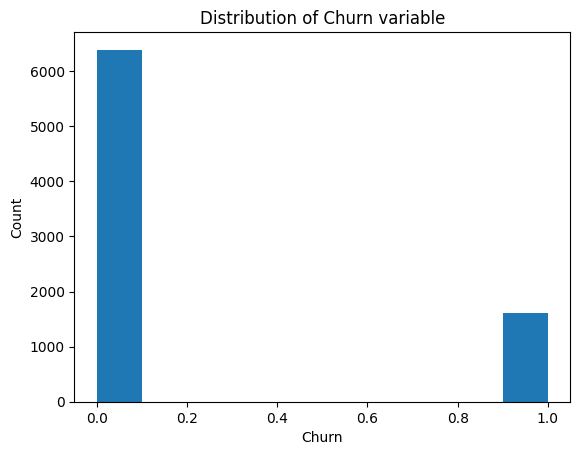

Percentage of churned customers: 20.11%


In [42]:
col = df['Churn']
col.value_counts()
plt.hist(col)
plt.title('Distribution of Churn variable')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#percentage of churned customers
churned_percentage = (col.value_counts()[1] / len(col)) * 100
print(f'Percentage of churned customers: {churned_percentage:.2f}%')

In [61]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop(columns=['Churn'])
df_numeric.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary
0,632,50,5,107959.39,1,1,1,6985
1,649,42,7,0.00,2,0,1,22974
2,595,29,6,150685.79,1,1,0,87771
3,653,35,6,116662.96,2,1,1,23864
4,559,40,7,144470.77,1,1,1,18918


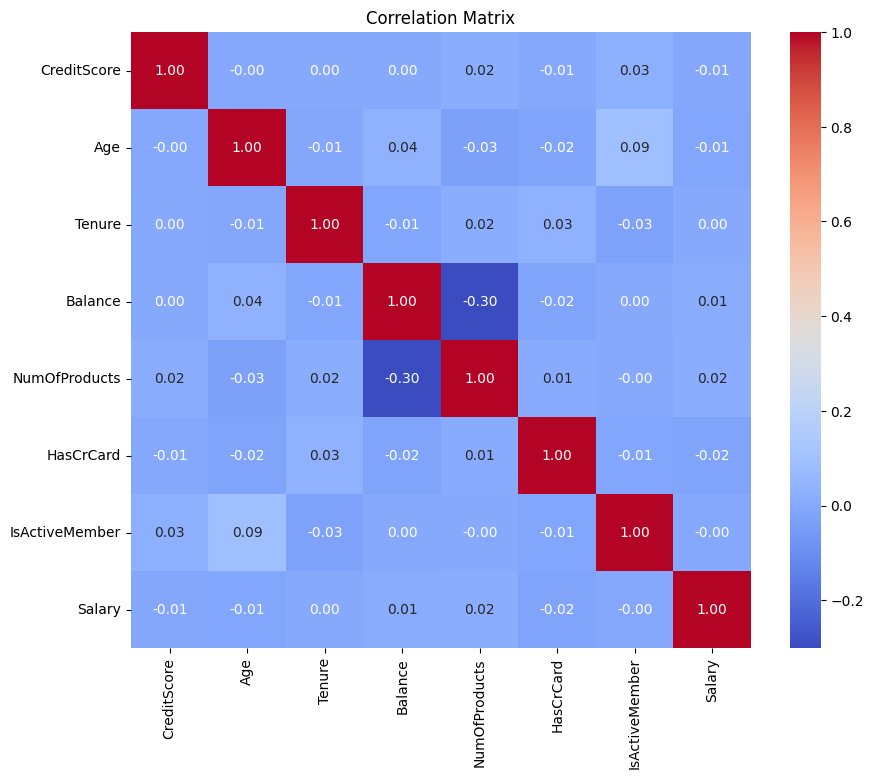

In [62]:
# Correlation matrix 
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Généralement, on remarque qu'il n'y a pas de corrélation entre les features. En revanche, cette corélation modérement négative (-0.3) montre qu'il y a ue relation linaière inverse entre le balance de l'utilisateur et son nombre de produits. Les clients ayant des balances élevées ont tendance d'avoir moins de produits.

**Etape 3**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     8000 non-null   int64  
 1   Geography       8000 non-null   object 
 2   Gender          8000 non-null   object 
 3   Age             8000 non-null   int64  
 4   Tenure          8000 non-null   int64  
 5   Balance         8000 non-null   float64
 6   NumOfProducts   8000 non-null   int64  
 7   HasCrCard       8000 non-null   int64  
 8   IsActiveMember  8000 non-null   int64  
 9   Salary          8000 non-null   int64  
 10  Churn           8000 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 687.6+ KB


*Analyse Statistique Univariée*

C:\Users\hp\AppData\Local\Temp\ipykernel_72\3898872421.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


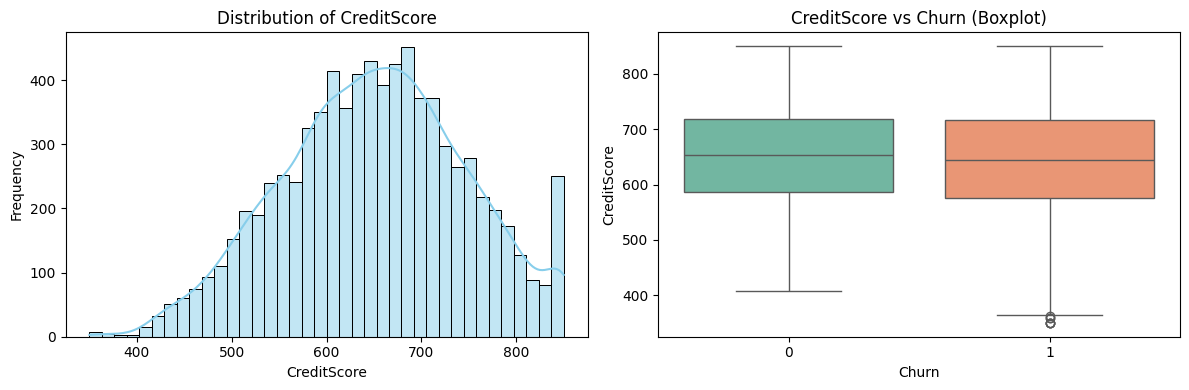

C:\Users\hp\AppData\Local\Temp\ipykernel_72\3898872421.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


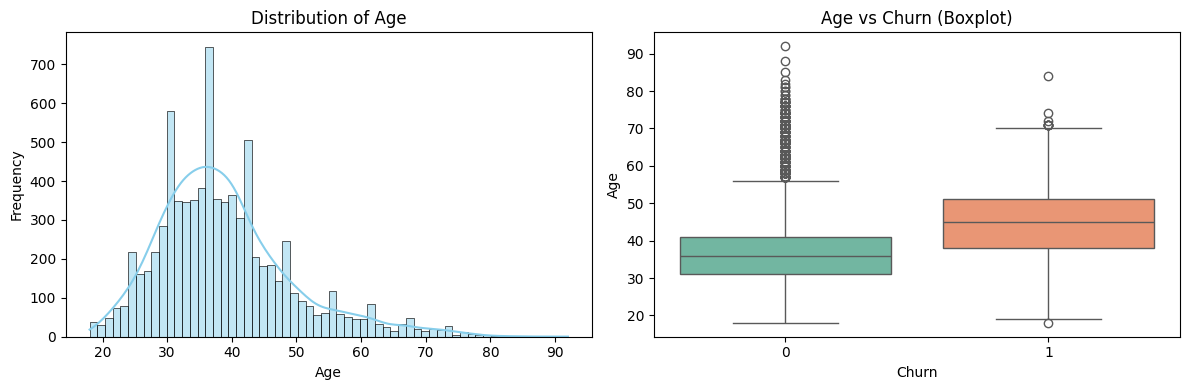

C:\Users\hp\AppData\Local\Temp\ipykernel_72\3898872421.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


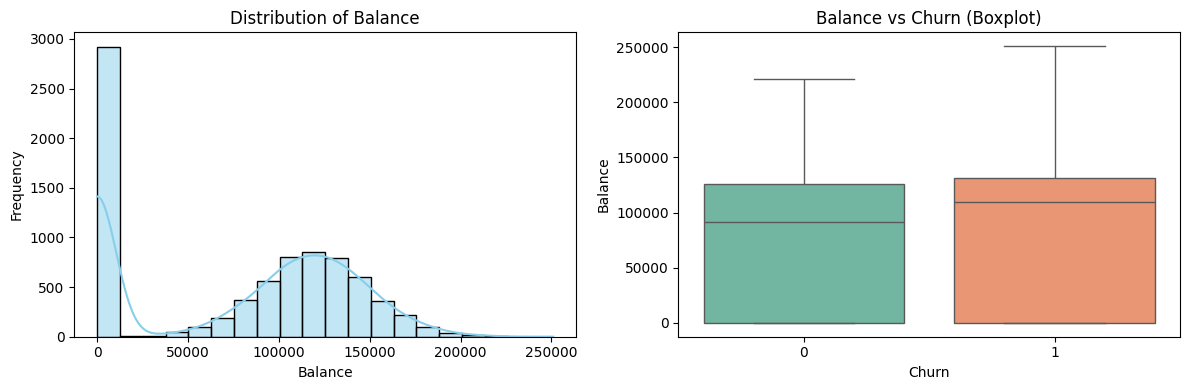

C:\Users\hp\AppData\Local\Temp\ipykernel_72\3898872421.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


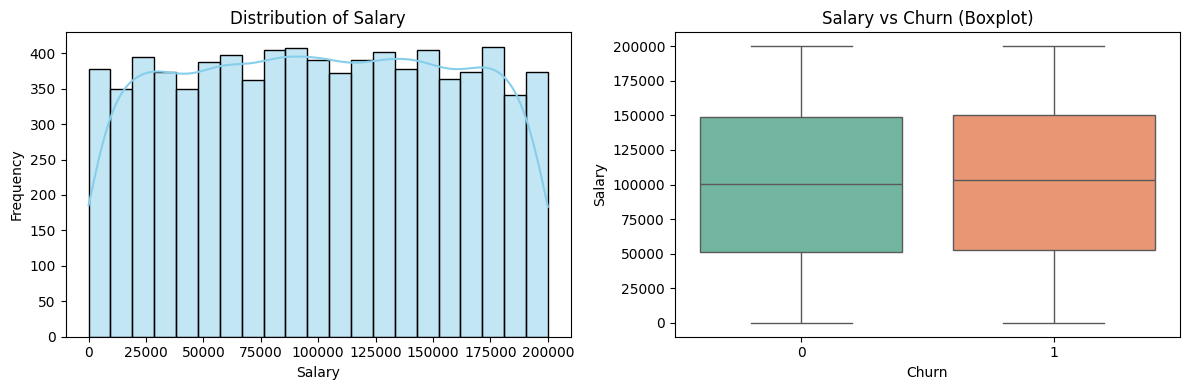

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = ['CreditScore', 'Age', 'Balance', 'Salary']

for col in num_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogramme avec une couleur
    sns.histplot(df[col], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Scatterplot avec une autre couleur
    sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")
    axes[1].set_title(f'{col} vs Churn (Boxplot)')
    #axes[1].set_title(f'{col} vs Churn')
    axes[1].set_ylabel(col)
    axes[1].set_xlabel('Churn')

    plt.tight_layout()
    plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_72\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


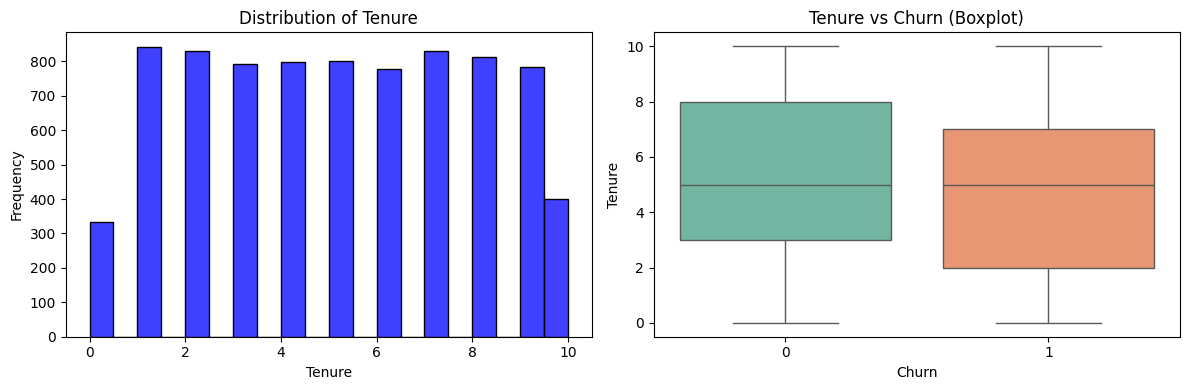

C:\Users\hp\AppData\Local\Temp\ipykernel_72\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


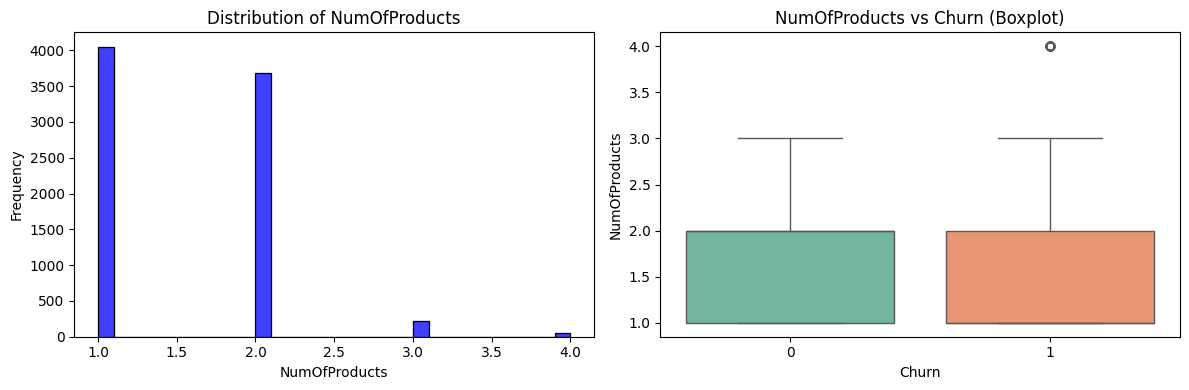

C:\Users\hp\AppData\Local\Temp\ipykernel_72\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


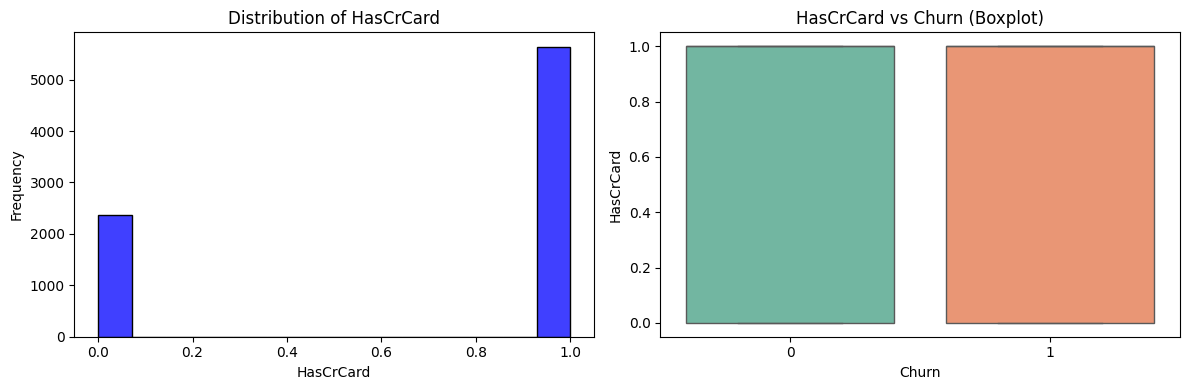

C:\Users\hp\AppData\Local\Temp\ipykernel_72\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


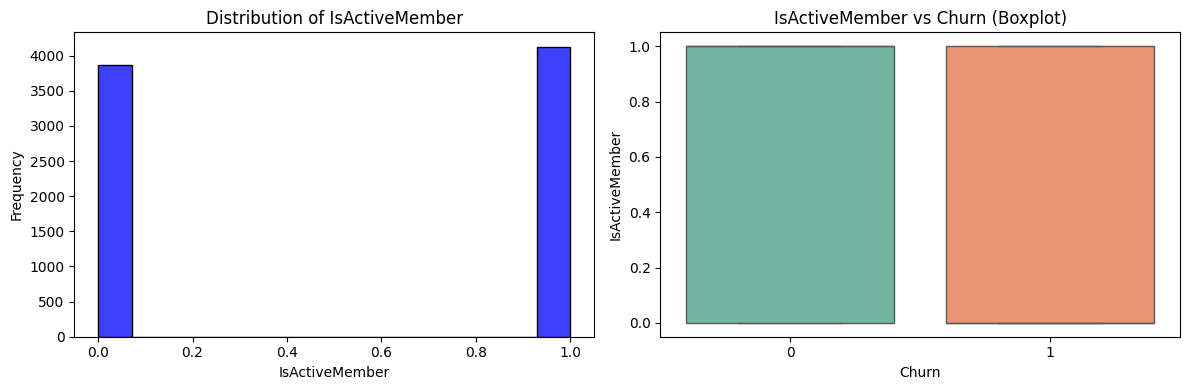

C:\Users\hp\AppData\Local\Temp\ipykernel_72\2984046759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")


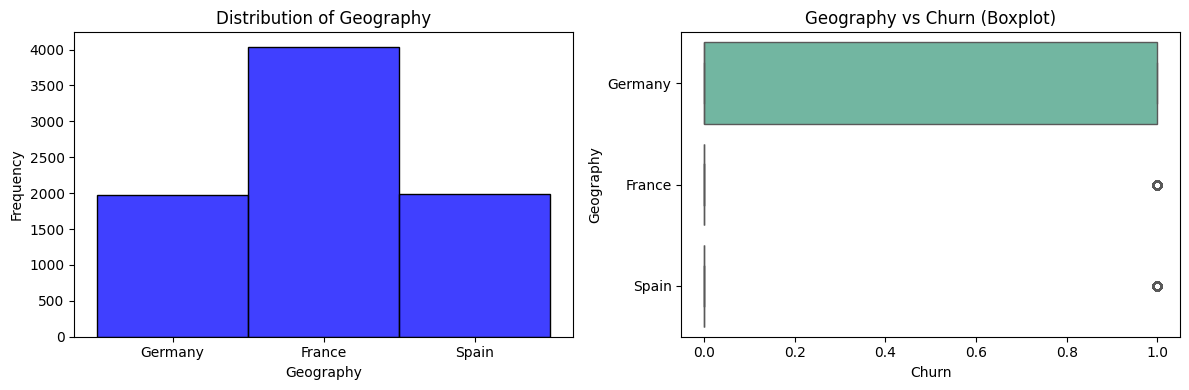

In [88]:
## Distribution des variables catégorielles
cat_columns =['Tenure', 'NumOfProducts', 'HasCrCard',  'IsActiveMember', 'Geography']
for col in cat_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogramme avec une couleur
    sns.histplot(df[col], kde=False, ax=axes[0], color="blue")
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Scatterplot avec une autre couleur
    sns.boxplot(x=df['Churn'], y=df[col], ax=axes[1], palette="Set2")
    axes[1].set_title(f'{col} vs Churn (Boxplot)')
    #axes[1].set_title(f'{col} vs Churn')
    axes[1].set_ylabel(col)
    axes[1].set_xlabel('Churn')

    plt.tight_layout()
    plt.show()
    
    


*Analyse Statistique Bivariée*

In [95]:
#Numeric vs numeric
df_numeric = df[num_columns]
df_numeric.head()

,CreditScore,Age,Balance,Salary
0,632,50,107959.39,6985
1,649,42,0.00,22974
2,595,29,150685.79,87771
3,653,35,116662.96,23864
4,559,40,144470.77,18918


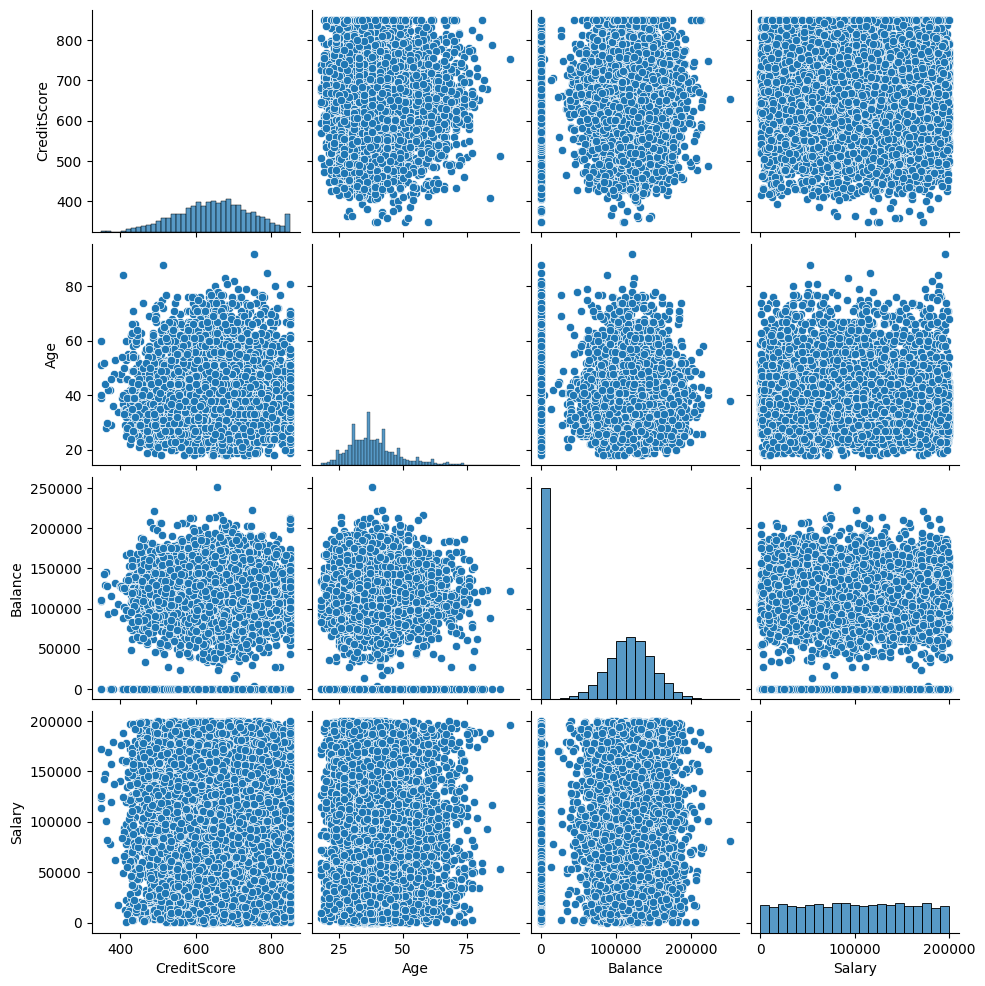

In [102]:
custom_palette = ['lightblue', 'green', 'orange', 'purple']
sns.pairplot(df_numeric)
plt.show()
